<a href="https://colab.research.google.com/github/Permanganant/EHB-420E---Artificial-Neural-Networks-/blob/main/HW4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EHB 420E Artificial Neural Networks
# Homework - 4

Mert Alperen Beser

Colab Link --> https://colab.research.google.com/drive/12bhDgAUCzptwzt9eGzR7AP_QqrxFkEMy#scrollTo=9dmjQYrq-GzT

---

### a) You	plan	to	apply	a	Naive	Bayes	classifier	to	this	problem.	Given	the	class	label,	this	model	treats	each word	in	the	sentence	as	an	independent	feature. The	parameters	of	this	model	take	the	form	of	conditional probabilities P (G), P (W ord =		“am”	G). Using the training data, find the maximum likelihood estimate of the parameters	(they	will	be	the	class-conditional	relative	frequencies	of	each	word). Ignore	punctuation	and capitalization.

In [ ]:
#Introduce training data as dictionary
thisdict = {
  "I am definitely innocent officer": "I",
  "officer  I swear I am not lying": "I",
  "I am not lying I swear": "I",
  "I am innocent  officer  I swear" :"G",
  "officer I am definitely not lying":"G",
}

In [ ]:
def Naive_Bayes(A,B,dic):
  counter = 0
  counter2 = 0
  
  keys = list(dic.keys())
  values = list(dic.values())
  #len_keys = len(keys)
  length = 0
  for word in values:
    
    if word == B:
      keys_s = keys[counter]
      keys_s = keys_s.split()
      
      length = length + len(keys_s)
      counter2 = counter2 + keys_s.count(A)
    

    counter = counter + 1

  result = (counter2) / (8+length)
  print("Naive Bayes result for: P(%s:%s) " %(A,B))
  print(result)

  return result


def P(A,dic):
  keys = list(dic.keys())
  counter  = 0
  length = 0
  for i in range (0,5):
    keys_s = keys[i].split()
    counter = counter + keys_s.count(A)
    length = length + len(keys_s)

  return counter/length

P_G = 2/5
P_I = 3/5
#Innocent
I_I= Naive_Bayes("I","I",thisdict)
am_I = Naive_Bayes("am","I",thisdict)
definitely_I = Naive_Bayes("definitely","I",thisdict)
innocent_I = Naive_Bayes("innocent","I",thisdict)
officer_I = Naive_Bayes("officer","I",thisdict)
swear_I = Naive_Bayes("swear","I",thisdict)
not_I = Naive_Bayes("not","I",thisdict)
lying_I =  Naive_Bayes("lying","I",thisdict)

#Guilty
I_G = Naive_Bayes("I","G",thisdict)
am_G = Naive_Bayes("am","G",thisdict)
definitely_G  = Naive_Bayes("definitely","G",thisdict)
innocent_G = Naive_Bayes("innocent","G",thisdict)
officer_G = Naive_Bayes("officer","G",thisdict)
swear_G = Naive_Bayes("swear","G",thisdict)
not_G = Naive_Bayes("not","G",thisdict)
lying_G = Naive_Bayes("lying","G",thisdict)

Naive Bayes result for: P(I:I) 
0.19230769230769232
Naive Bayes result for: P(am:I) 
0.11538461538461539
Naive Bayes result for: P(definitely:I) 
0.038461538461538464
Naive Bayes result for: P(innocent:I) 
0.038461538461538464
Naive Bayes result for: P(officer:I) 
0.07692307692307693
Naive Bayes result for: P(swear:I) 
0.07692307692307693
Naive Bayes result for: P(not:I) 
0.07692307692307693
Naive Bayes result for: P(lying:I) 
0.07692307692307693
Naive Bayes result for: P(I:G) 
0.15
Naive Bayes result for: P(am:G) 
0.1
Naive Bayes result for: P(definitely:G) 
0.05
Naive Bayes result for: P(innocent:G) 
0.05
Naive Bayes result for: P(officer:G) 
0.1
Naive Bayes result for: P(swear:G) 
0.05
Naive Bayes result for: P(not:G) 
0.05
Naive Bayes result for: P(lying:G) 
0.05


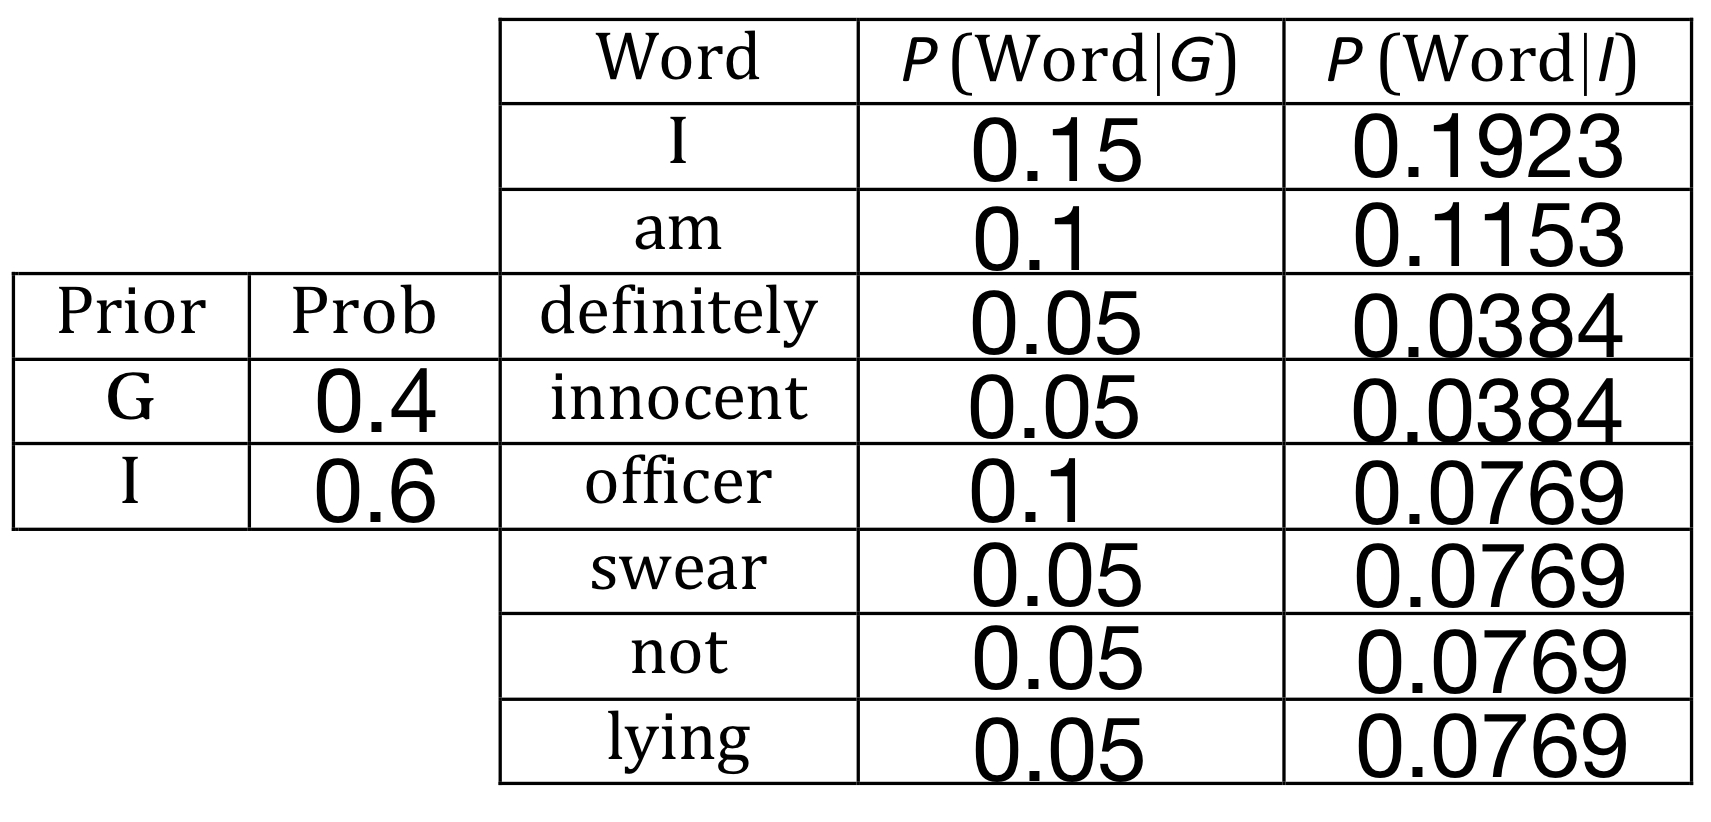

### b) Using the probabilities found above, compute the following probabilities:

---

**P (G,“Officer, I am not lying”)**

In [ ]:
P_officer_I_am_not_lying = P("officer",thisdict)*P("I",thisdict)*P("am",thisdict)*P("not",thisdict)*P("lying",thisdict)
result = officer_G * I_G * am_G * not_G * lying_G * P_G / P_officer_I_am_not_lying
print("P(G,“Officer, I am not lying”): ",result)

P(G,“Officer, I am not lying”):  0.025312500000000005


**P (I,“Officer, I am not lying”)**

In [ ]:
result = officer_I * I_I * am_I * not_I * lying_I * P_I / P_officer_I_am_not_lying
print("P(I,“Officer, I am not lying”): ",result)

P(I,“Officer, I am not lying”):  0.10226088291457154


### c) Another suspect has been caught; this time, he gives the statement “I am honest, officer”. Using the same Naive Bayes model, compute the probability **P (G,“I am honest, officer”)**.

In [ ]:
honest_G = Naive_Bayes("honest", "G",thisdict)
result = I_G* am_G * honest_G * officer_G

Naive Bayes result for: P(honest:G) 
0.0


### d) Instead	 of	 maximum	 likelihood,	 use	 Laplace	 (add-one)	 smoothing	 to	 find	 new	 values	 for	 the	 modelparameters (using the same training data as in (a)) and use these new parameters to compute the probability P (G|“I am honest, officer”). Assume	 for	 the	purposes	of	smoothing	 that	every	word	you	will	see	is	contained	in	your	 training	set	and	 test sentence (but	do	not	use	the	test	sentence	when	computing	parameter	estimates). Make sure	to	smooth	both the prior P (G), P (I) and conditional distributions.

In [ ]:
def Naive_Bayes_Laplace(A,B,dic):
  counter = 0
  counter2 = 0
  keys = list(dic.keys())
  values = list(dic.values())
  #len_keys = len(keys)
  length = 0
  for word in values:
    
    if word == B:
      keys_s = keys[counter]
      keys_s = keys_s.split()
      
      length = length + len(keys_s)
      counter2 = counter2 + keys_s.count(A)
    


    counter = counter + 1

  result = (1+counter2) / (8+length)
  print("Laplace Smoothing - Naive Bayes result for: P(%s:%s) " %(A,B))
  print(result)

  return result

I_G = Naive_Bayes_Laplace("I","G",thisdict)
am_G = Naive_Bayes_Laplace("am","G",thisdict)
honest_G = Naive_Bayes_Laplace("honest", "G",thisdict)
officer_G = Naive_Bayes_Laplace("officer","G",thisdict)

Laplace Smoothing - Naive Bayes result for: P(I:G) 
0.2
Laplace Smoothing - Naive Bayes result for: P(am:G) 
0.15
Laplace Smoothing - Naive Bayes result for: P(honest:G) 
0.05
Laplace Smoothing - Naive Bayes result for: P(officer:G) 
0.15


In [ ]:
#Posterior probability
result = I_G*am_G*honest_G*officer_G
print("P (G|“I am honest, officer”): ",result)

P (G|“I am honest, officer”):  0.000225


###a) Compute the first two updates of the Perceptron algorithm and fill in the following table, using the given initial Perceptron weights w = (w1, w2, w3) and data points (φ1, φ2, φ3, Label).

In [1]:
#weights(t + 1) = weights(t) + learning_rate * (expected_i – predicted_) * input_i
#w1φ1(x) + w2φ2(x) + w3 >= 0 
import numpy as np

def MSE(y_predicted, y):
  squared_error = (y_predicted - y) ** 2
  sum_squared_error = np.sum(squared_error)
  mse = sum_squared_error / 5
  return(mse)


learning_rate = 0.1

phi_1 = [0,1,1,0,1]
phi_2 = [0,1,1,1,0]
phi_3 = [1,1,1,1,1]
x = np.transpose([phi_1,phi_2,phi_3])
y = [1,1,1,-1,-1]
w = [1,2,-0.5]


result = np.dot(w,x[0])

if result >= 0.0:
  predict = 1
else:
  predict = 0

ars = y[0] - predict
w = w + learning_rate * ars * x[0]
print("First weights: ",w)

result = np.dot(w,x[4])
if result >= 0:
  predict = 1
else:
  predict = 0

ars = y[4] - predict
w = w + learning_rate * ars * x[4]
err = MSE(predict,y[4])

print("Second weights: ",w)
print("Mean Square Error: ",err)

First weights:  [ 1.   2.  -0.4]
Second weights:  [ 0.8  2.  -0.6]
Mean Square Error:  0.8


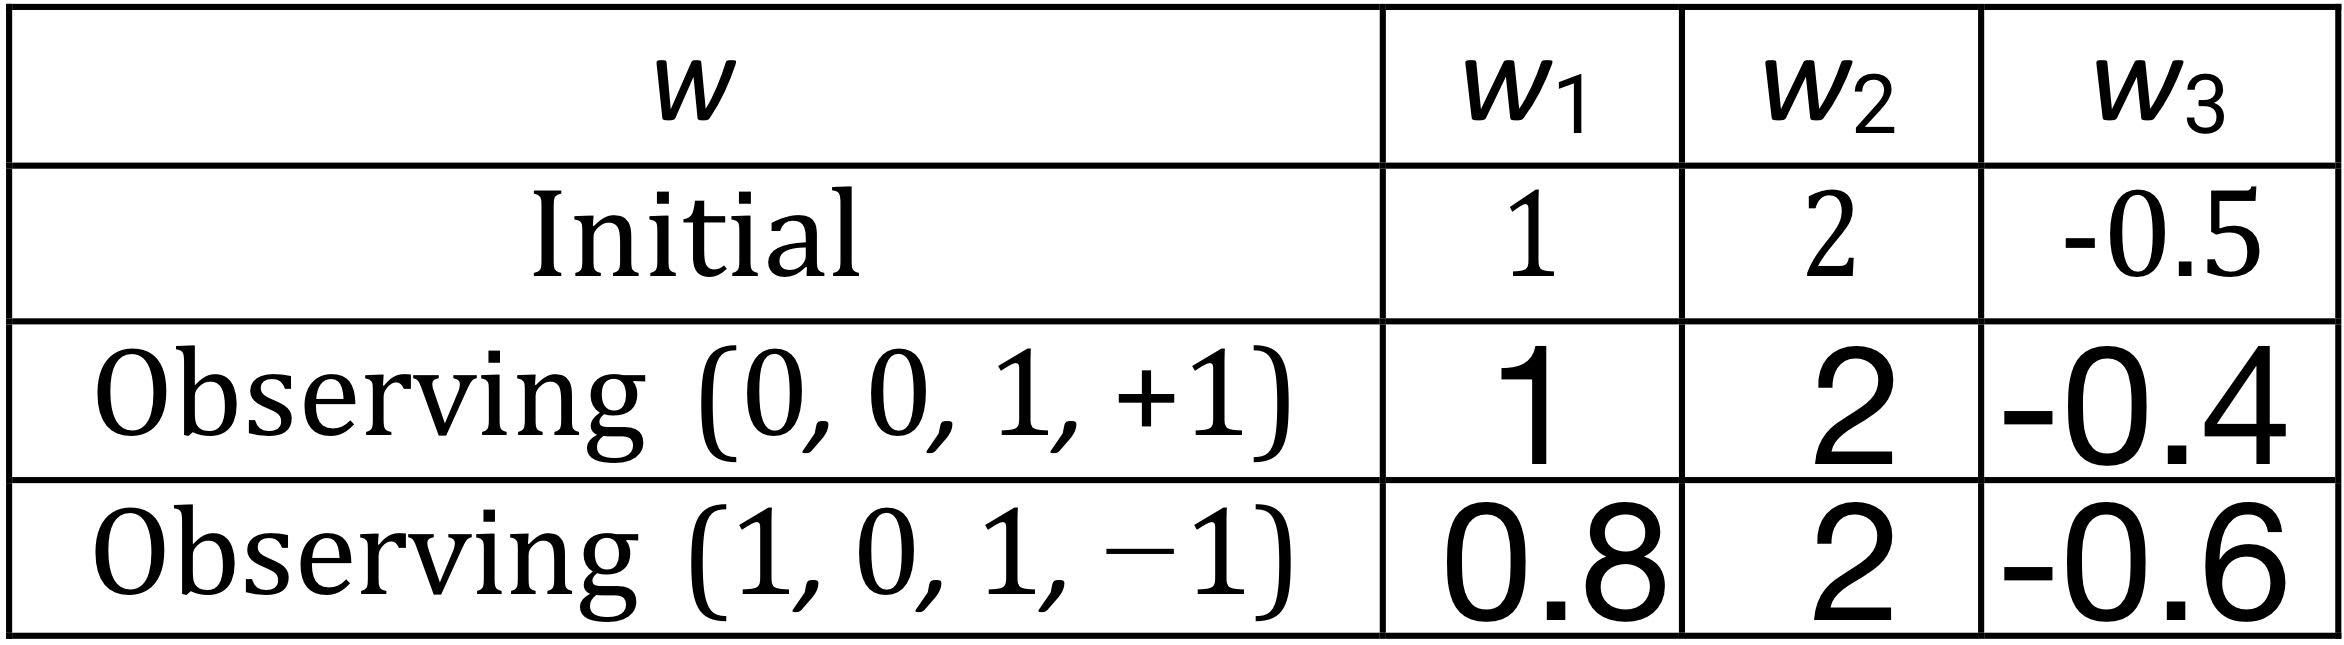

### b) What convergence guarantees can you give for the Perceptron algorithm applied to this data set?

Weights0:  [ 1.    2.   -0.49] err: 0.2
Weights0:  [ 1.    2.   -0.49] err: 0.0
Weights0:  [ 1.    2.   -0.49] err: 0.0
Weights0:  [ 1.    1.98 -0.51] err: 0.8
Weights0:  [ 0.98  1.98 -0.53] err: 0.8
Weights1:  [ 0.98  1.98 -0.52] err: 0.2
Weights1:  [ 0.98  1.98 -0.52] err: 0.0
Weights1:  [ 0.98  1.98 -0.52] err: 0.0
Weights1:  [ 0.98  1.96 -0.54] err: 0.8
Weights1:  [ 0.96  1.96 -0.56] err: 0.8
Weights2:  [ 0.96  1.96 -0.55] err: 0.2
Weights2:  [ 0.96  1.96 -0.55] err: 0.0
Weights2:  [ 0.96  1.96 -0.55] err: 0.0
Weights2:  [ 0.96  1.94 -0.57] err: 0.8
Weights2:  [ 0.94  1.94 -0.59] err: 0.8
Weights3:  [ 0.94  1.94 -0.58] err: 0.2
Weights3:  [ 0.94  1.94 -0.58] err: 0.0
Weights3:  [ 0.94  1.94 -0.58] err: 0.0
Weights3:  [ 0.94  1.92 -0.6 ] err: 0.8
Weights3:  [ 0.92  1.92 -0.62] err: 0.8
Weights4:  [ 0.92  1.92 -0.61] err: 0.2
Weights4:  [ 0.92  1.92 -0.61] err: 0.0
Weights4:  [ 0.92  1.92 -0.61] err: 0.0
Weights4:  [ 0.92  1.9  -0.63] err: 0.8
Weights4:  [ 0.9   1.9  -0.65] err: 0.8


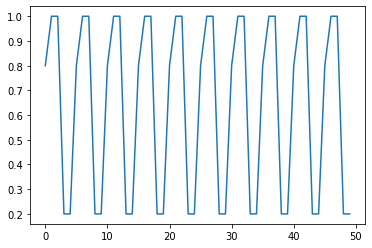

In [ ]:
import matplotlib.pyplot as plt


def MSE(y_predicted, y):
  squared_error = (y_predicted - y) ** 2
  sum_squared_error = np.sum(squared_error)
  mse = sum_squared_error / 5
  return(mse)

learning_rate = 0.01
step_size = 10
a = []

y = [1,1,1,-1,-1]
w = [1,2,-0.5]
identity = np.transpose([1,1,1])

for j in range(0,step_size):
  for i in range(0,len(x)):
    result = np.dot(w,x[i])

    if result >= 0.0:
      predict = 1
    else:
      predict = 0

    loss = y[i] - predict
    w = w + (learning_rate * loss* x[i])
    err = MSE(predict,y[i])
    
    print("Weights%s: " %j, w,"err:", err)
    a.append(1-err)
plt.plot(a)

There is no convergence as can be seen from the accuracy figure for 10 step and 0.01 learning rate. However, there are weights that can provide zero error for our model as seen above. 

### c) For what values of the weight vector w = (w1, w2) does the classifier wTφ(x) >= 0 separate the given data?

w1.x^2+w2 ≥ 0

Assume x = 1 or x = -1.Then, w1 + w2 ≥ 0 and it equals to w1 ≥ -w2

If we assume x = 0 then w2 ≥ 0 and so w2 must be less than 0. As a result values of weight vector should satisfies the following requirements **a>0** ,**|a| ≥ |b|**

---


---


### d) Which of the following feature sets allows a linear classifier w = (w1, w2, w3) to separate the original interrogation data set? Justify your answer briefly.

i) φ′ = (φ1 + φ2, φ1 − φ2, 1)

The function below gives all weights between the values of -5 and 5 as 20 pieces. If the function classifies our data as desired it prints the values of weights that occurred when the classifier is successful. Otherwise, the function will not print anything if it is not possible to classify our data.

In [ ]:
data = [[0,0,1,1],[2,0,1,1],[2,0,1,1],[1,-1,1,-1],[1,1,1,-1]]

In [ ]:
import numpy as np

w_1 = np.linspace(-5,5,20)
w_2 = np.linspace(-5,5,20)
w_3 = np.linspace(-5,5,20)
for w3 in w_1:
  for w2 in w_2:
    for w1 in w_3:
      res = []
      for i in range(0,len(data)):
        x1 = data[i][0]
        x2 = data[i][1]
        x3 = data[i][2]

        result = x1*w1 + x2*w2 + x3*w3
        if (result >= 0 and (data[i][3] == 1)) or (result <0 and (data[i][3] == -1)):
          res.append(1)
          #print(i)
          
        else:
          res.append(-1)
      #print(res)
      if sum(res) == len(res):
        print(sum(res))
        print(res)
        print("w1: ",w1,"w2: ",w2,"w3",w3)


The code above gives nothing as a result because **it is not possible to classify with this given equation** and there are no weights that classify our data as desired.

ii) φ′ = (φ1φ2, φ2, 1)

The function below gives all weights between the values of -5 and 5 as 20 pieces. If the function classifies our data as desired it prints the values of weights that occurred when the classifier is successful. Otherwise, the function will not print anything if it is not possible to classify our data.

In [ ]:
data = [[0,0,1,1],[1,1,1,1],[1,1,1,1],[0,1,1,-1],[0,0,1,-1]]

In [ ]:
import numpy as np

w_1 = np.linspace(-5,5,20)
w_2 = np.linspace(-5,5,20)
w_3 = np.linspace(-5,5,20)
for w3 in w_1:
  for w2 in w_2:
    for w1 in w_3:
      res = []
      for i in range(0,len(data)):
        x1 = data[i][0]
        x2 = data[i][1]
        x3 = data[i][2]

        result = x1*w1 + x2*w2 + x3*w3
        if (result >= 0 and (data[i][3] == 1)) or (result <0 and (data[i][3] == -1)):
          res.append(1)
          #print(i)
          
        else:
          res.append(-1)
      #print(res)
      if sum(res) == len(res):
        print(sum(res))
        print(res)
        print("w1: ",w1,"w2: ",w2,"w3",w3)


The code above gives nothing as a result because **it is not possible to classify  with this given equation** and there are no weights that classify our data as desired.

iii) φ′ = ((φ1 xor φ2),φ2, 1) where a xor b is 1 if either a = 1 or b = 1 but not both.

The function below gives all weights between the values of -5 and 5 as 20 pieces. If the function classifies our data as desired it prints the values of weights that occurred when the classifier is successful. Otherwise, the function will not print anything if it is not possible to classify our data.

In [ ]:
data = [[1,0,1,1],[1,1,1,1],[1,1,1,1],[0,1,1,-1],[0,0,1,-1]]

In [ ]:
import numpy as np

w_1 = np.linspace(-5,5,20)
w_2 = np.linspace(-5,5,20)
w_3 = np.linspace(-5,5,20)
for w3 in w_1:
  for w2 in w_2:
    for w1 in w_3:
      res = []
      for i in range(0,len(data)):
        x1 = data[i][0]
        x2 = data[i][1]
        x3 = data[i][2]

        result = x1*w1 + x2*w2 + x3*w3
        if (result >= 0 and (data[i][3] == 1)) or (result <0 and (data[i][3] == -1)):
          res.append(1)
          #print(i)
          
        else:
          res.append(-1)
      #print(res)
      if sum(res) == len(res):
        print(sum(res))
        print(res)
        print("w1: ",w1,"w2: ",w2,"w3",w3)

5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  0.2631578947368416 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  0.7894736842105257 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  1.3157894736842106 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  1.8421052631578947 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  2.3684210526315788 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  2.894736842105263 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  3.421052631578947 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  3.947368421052632 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  4.473684210526315 w3 -5.0
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  -0.2631578947368425 w3 -4.473684210526316
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  0.2631578947368416 w3 -4.473684210526316
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  0.7894736842105257 w3 -4.473684210526316
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  1.3157894736842106 w3 -4.473684210526316
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  1.8421052631578947 w3 -4.473684210526316
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  2.3684210526315788 w3 -4.473684210526316
5
[1, 1, 1, 1, 1]
w1:  5.0 w2:  2.

The code above gives the weight that occurred when the classification is possible for given data and equations. It can be said that with φ′ = ((φ1 xor φ2),φ2, 1) ***it is possible to classify our data.***

---


### e) Given the features φ(x) = [x2, x, 1], how many data points are we guaranteed to be able to separate with	zero	error	using	a	linear	classifier	wTφ(x)	=	w1x2 +	w2x +	w3?	Assume	that	a	data	point	x cannot	have conflicting labels. Justify your answer briefly.

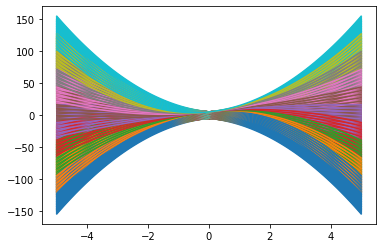

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = [[0,0,1,1],[1,1,1,1],[1,1,1,1],[0,1,1,-1],[1,0,1,-1]]
w_1 = np.linspace(-5,5,10)
w_2 = np.linspace(-5,5,10)
w_3 = np.linspace(-5,5,10)
for w3 in w_3:
  for w2 in w_2:
    for w1 in w_1:
      result = w1*(x**2)+ w2 * x+ w3
      plt.plot(x,result)

As we can see above our function generates parabolas as a classifier. However, the parabola can only classify 3 data points at once as seen in the figure below. So, it is not possible to classify 4 data points and above.

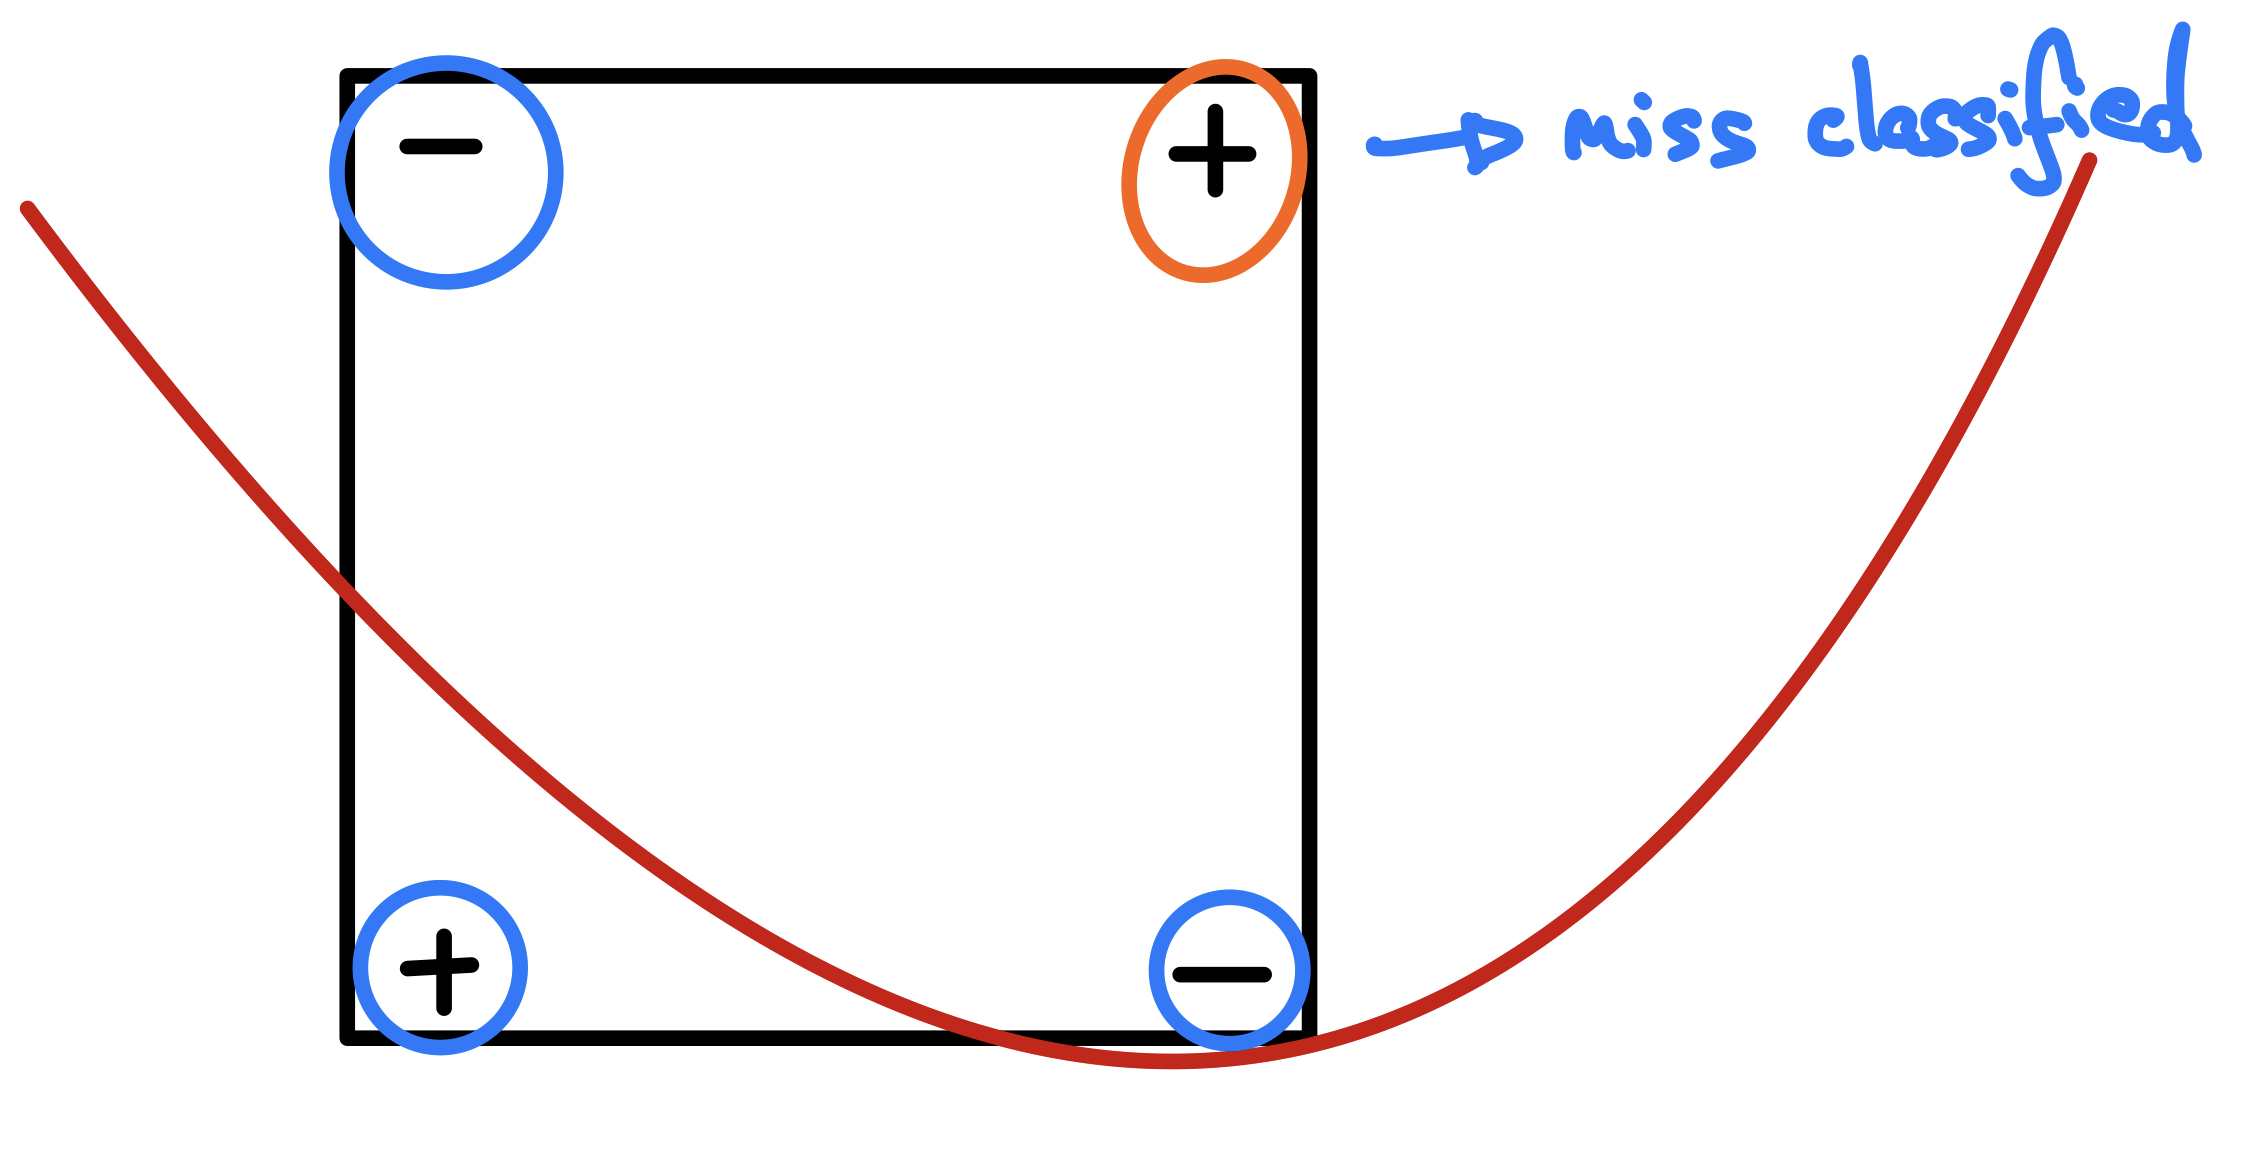

### f) In general, if we use features φ(x) = [xN−1, xN−2, ..., 1], i.e. an N 1th order polynomial, how many points can we separate with zero error using a linear classifier w = [w1, ..., wN ]? Justify your answer briefly.

If we use given polynomial featured data set. All data points can be separated correctly in training data set. However, it is highly probabale that the model memorize the training set and this can cause less accuacy in test data.

### g) Assume	we	have	N labeled	training	data	points,	which	we	would	like	to	use	for	classification	i.e. to predict the labels of unseen test data points. What are the disadvantages of using an Nth order polynomial to fit this data?

Disadvatages of using Nth order polynomial while fitting the data is memorizing the training data as I mentioned in previous question. It is likely to classify wrongly for test data set. This fenomna generally called as overfitting in literature.